In [13]:
import numpy as np
import re
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

%matplotlib inline

In [2]:
team_lookup = pickle.load(open('teams_lookup.pickle', "rb" ))
df = pickle.load(open('final_19.pickle', "rb" ))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feed5b09be0>,
      dtype=object)

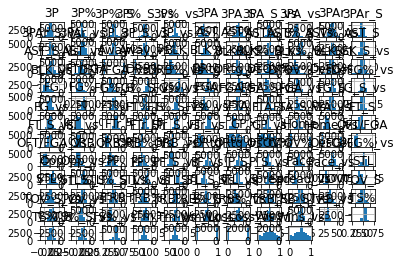

In [34]:
df.hist()[1]

In [7]:
df = df.dropna()
df.columns[:]

Index(['url', 'Team', 'Date', 'Opponent', 'Spread', 'Win_Loss', 'Home', 'Away',
       'GP', 'Wins',
       ...
       'BLK_S_vs', 'TOV_S_vs', 'PF_S_vs', 'FTr_S_vs', '3PAr_S_vs', 'TS%_S_vs',
       'TRB%_S_vs', 'AST%_S_vs', 'STL%_S_vs', 'BLK%_S_vs'],
      dtype='object', length=137)

In [8]:
df.describe()

,Spread,Win_Loss,Home,Away,GP,Wins,Tm,Opp,FG,FGA,...,BLK_S_vs,TOV_S_vs,PF_S_vs,FTr_S_vs,3PAr_S_vs,TS%_S_vs,TRB%_S_vs,AST%_S_vs,STL%_S_vs,BLK%_S_vs
count,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,...,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000
mean,0.000000,0.500000,0.437767,0.437767,16.091863,0.507124,72.623941,72.367769,25.594886,58.159374,...,0.014936,-0.058037,-0.028458,0.105316,-0.001651,-0.004423,99.131643,0.001009,0.000487,0.000209
std,14.975025,0.500023,0.496135,0.496135,8.990526,0.251099,7.002971,6.870160,2.628895,3.734147,...,1.626239,2.556341,2.627701,0.085625,0.238383,0.063857,7.944502,0.049595,0.026136,0.022443
min,-68.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34.000000,34.000000,13.000000,40.000000,...,-9.000000,-14.000000,-26.000000,-0.400571,-1.983974,-0.421164,53.600000,-0.324910,-0.160643,-0.130058
25%,-10.000000,0.000000,0.000000,0.000000,8.000000,0.333333,68.600000,68.042614,24.071429,55.777778,...,-1.000000,-1.666667,-1.619048,0.056683,-0.155100,-0.041973,94.000000,-0.028271,-0.014999,-0.013486
50%,0.000000,0.500000,0.000000,0.000000,16.000000,0.500000,72.591751,72.166667,25.500000,57.855042,...,0.000000,0.000000,-0.125000,0.106977,-0.003044,-0.001928,99.079130,0.000279,0.001005,-0.000497
75%,10.000000,1.000000,1.000000,1.000000,24.000000,0.692308,76.666667,76.800000,27.000000,60.047078,...,1.000000,1.570238,1.461538,0.154189,0.145541,0.033447,104.313214,0.031354,0.016012,0.013570
max,68.000000,1.000000,1.000000,1.000000,38.000000,1.000000,120.000000,106.000000,43.000000,87.500000,...,9.000000,14.000000,16.000000,1.184524,2.075321,0.412465,142.400000,0.320285,0.160643,0.130058


In [9]:
X = df.drop(columns = ['url','Team','Date','Opponent','Spread','Win_Loss','Team_vs','Date_vs','Opponent_vs','Spread_vs','Win_Loss_vs','GP_vs'])
y = df.loc[:,['Spread']]

In [10]:
df.isnull().values.any()

False

In [11]:
def split_and_validate(X,y):
    # perform train/val split
    X_train = X.loc[[12 < x <= 24 for x in X.loc[:,'GP']],:]
    X_val = X.loc[[24 < x <= 28 for x in X.loc[:,'GP']],:]
    y_train = y.loc[[12 < x <= 24 for x in X.loc[:,'GP']],:]
    y_val = y.loc[[24 < x <= 28 for x in X.loc[:,'GP']],:]

    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)

    print('\nValidation R^2 score was:', val_score)
    
    # report results
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_[0]):
        print(feature, ':', coef) 

In [12]:
split_and_validate(X,y)


Validation R^2 score was: 0.29851897926224125
Feature coefficient results: 

Home : 1.7842654679583805
Away : -31486868625.53343
GP : -0.0009004123666234154
Wins : 2.7202104731830925
Tm : -287688180739.0704
Opp : 287688180753.0194
FG : -27.442683143762416
FGA : 0.8473122489186025
FG% : -488.2605091224024
3P : -16.617161230876402
3PA : -0.3469848541968221
3P% : -15.315668356159549
FT : -7.234659629427415
FTA : -4.313312670273092
FT% : 9.970724873521325
ORB : -2.207650608985217
TRB : 0.1381496337971887
AST : 0.7409399829552248
STL : -6.002478104537738
BLK : -0.3789767282923779
TOV : -0.3820549393857977
PF : 1.2485976561529295
ORtg : -0.41831917138861485
DRtg : 0.7810935010558783
Pace : -0.04209277680795635
FTr : -4490.678762062252
3PAr : 9.5744289975671
TS% : -435.89356710874375
TRB% : 71818029212.75961
AST% : -0.26438300691624145
STL% : 5.599028871675411
BLK% : 0.2870394494044096
OeFG% : 88.09916386193792
OTOV% : -0.037430763244628906
ORB% : 0.5085906982421875
OFT/FGA : -205.2408721596

In [15]:
cols = df.columns

In [28]:
print(cols[0:137])

Index(['url', 'Team', 'Date', 'Opponent', 'Spread', 'Win_Loss', 'Home', 'Away',
       'GP', 'Wins',
       ...
       'BLK_S_vs', 'TOV_S_vs', 'PF_S_vs', 'FTr_S_vs', '3PAr_S_vs', 'TS%_S_vs',
       'TRB%_S_vs', 'AST%_S_vs', 'STL%_S_vs', 'BLK%_S_vs'],
      dtype='object', length=137)


In [ ]:
        ['Wins','Tm', 'Opp', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'ORtg', 'DRtg', 'Pace', 'FTr',
       '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'OeFG%', 'OTOV%', 'ORB%',
       'OFT/FGA', 'DeFG%', 'DTOV%', 'DRB%', 'DFT/FGA','P_S', 'FG_S', 'FGA_S', 'FG%_S', '3P_S', '3PA_S',
       '3P%_S', 'FT_S', 'FTA_S', 'FT%_S', 'TRB_S', 'AST_S', 'STL_S', 'BLK_S','TOV_S', 'PF_S', 'FTr_S', '3PAr_S', 'TS%_S', 'TRB%_S', 'AST%_S',
       'STL%_S', 'BLK%_S'

In [ ]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Spread ~ ', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()